### Recommendation Engine
This will help in recommending Mobile Phones to a user based on popularity and personalized to the user.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Reading Review file
df_review_file_1 = pd.read_csv('Dataset/phone_user_review_file_1.csv', encoding='ISO-8859-1')

In [3]:
df_review_file_1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [4]:
df_review_file_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374910 entries, 0 to 374909
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   phone_url  374910 non-null  object 
 1   date       374910 non-null  object 
 2   lang       374910 non-null  object 
 3   country    374910 non-null  object 
 4   source     374910 non-null  object 
 5   domain     374910 non-null  object 
 6   score      366691 non-null  float64
 7   score_max  366691 non-null  float64
 8   extract    371934 non-null  object 
 9   author     371641 non-null  object 
 10  product    374910 non-null  object 
dtypes: float64(2), object(9)
memory usage: 31.5+ MB


In [5]:
df_review_file_2 = pd.read_csv('Dataset/phone_user_review_file_2.csv', encoding='ISO-8859-1')

In [6]:
df_review_file_2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [7]:
df_review_file_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114925 entries, 0 to 114924
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   phone_url  114925 non-null  object 
 1   date       114925 non-null  object 
 2   lang       114925 non-null  object 
 3   country    114925 non-null  object 
 4   source     114925 non-null  object 
 5   domain     114925 non-null  object 
 6   score      112166 non-null  float64
 7   score_max  112166 non-null  float64
 8   extract    113965 non-null  object 
 9   author     113290 non-null  object 
 10  product    114925 non-null  object 
dtypes: float64(2), object(9)
memory usage: 9.6+ MB


In [8]:
df_review_file_3 = pd.read_csv('Dataset/phone_user_review_file_3.csv', encoding='ISO-8859-1')

In [9]:
df_review_file_3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [10]:
df_review_file_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312961 entries, 0 to 312960
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   phone_url  312961 non-null  object 
 1   date       312961 non-null  object 
 2   lang       312961 non-null  object 
 3   country    312961 non-null  object 
 4   source     312961 non-null  object 
 5   domain     312961 non-null  object 
 6   score      304933 non-null  float64
 7   score_max  304933 non-null  float64
 8   extract    310231 non-null  object 
 9   author     302173 non-null  object 
 10  product    312960 non-null  object 
dtypes: float64(2), object(9)
memory usage: 26.3+ MB


In [11]:
df_review_file_4 = pd.read_csv('Dataset/phone_user_review_file_4.csv', encoding='ISO-8859-1')

In [12]:
df_review_file_4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [13]:
df_review_file_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98284 entries, 0 to 98283
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   phone_url  98284 non-null  object 
 1   date       98284 non-null  object 
 2   lang       98284 non-null  object 
 3   country    98284 non-null  object 
 4   source     98284 non-null  object 
 5   domain     98284 non-null  object 
 6   score      93706 non-null  float64
 7   score_max  93706 non-null  float64
 8   extract    96857 non-null  object 
 9   author     92696 non-null  object 
 10  product    98284 non-null  object 
dtypes: float64(2), object(9)
memory usage: 8.2+ MB


In [14]:
df_review_file_5 = pd.read_csv('Dataset/phone_user_review_file_5.csv', encoding='ISO-8859-1')

In [15]:
df_review_file_5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [16]:
df_review_file_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350216 entries, 0 to 350215
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   phone_url  350216 non-null  object 
 1   date       350216 non-null  object 
 2   lang       350216 non-null  object 
 3   country    350216 non-null  object 
 4   source     350216 non-null  object 
 5   domain     350216 non-null  object 
 6   score      321983 non-null  float64
 7   score_max  321983 non-null  float64
 8   extract    341836 non-null  object 
 9   author     321351 non-null  object 
 10  product    350216 non-null  object 
dtypes: float64(2), object(9)
memory usage: 29.4+ MB


In [17]:
df_review_file_6 = pd.read_csv('Dataset/phone_user_review_file_6.csv', encoding='ISO-8859-1')

In [18]:
df_review_file_6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [19]:
df_review_file_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163837 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   phone_url  163837 non-null  object 
 1   date       163837 non-null  object 
 2   lang       163837 non-null  object 
 3   country    163837 non-null  object 
 4   source     163837 non-null  object 
 5   domain     163837 non-null  object 
 6   score      152165 non-null  float64
 7   score_max  152165 non-null  float64
 8   extract    160949 non-null  object 
 9   author     150780 non-null  object 
 10  product    163837 non-null  object 
dtypes: float64(2), object(9)
memory usage: 13.7+ MB


#### Observations:
1. All 6 dataset have same column name with same data type.
2. We need to validate the max_score value as the data is taken from different sources, there is probability of having different scoring method. 
3. We will concat the dataset into a single dataframe for building recommendation engine.
4. Same products are mentioned with different name in different websites.
5. As I tested out, the products are same even though the names are mentioned differently in the dataset. For example, 
*   'Leagoo Lead 7 5.0 Inch HD JDI LTPS Screen 3G Smartphone' in amazon.com and 'Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM' in amazon.co.uk are same products.
* 'Samsung Galaxy S8' in phonearena and 'Samsung Galaxy S8 64GB (AT&T)' in samsung.com are same products.
6. We can observe consistency in phone url with the product name. So we will extract the product name from the phone_url and use it for further analysis.

In [20]:
#Merging the dataset into a single dataframe
df_review_complete = [df_review_file_1, df_review_file_2, df_review_file_3, df_review_file_4, df_review_file_5, df_review_file_6]
data = pd.concat(df_review_complete)

In [21]:
# Top 10 records
data.head(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
5,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8
6,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8
7,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8
8,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8
9,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,8.0,10.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8


In [22]:
# Bottom 10 records 
data.tail(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
163827,/cellphones/alcatel-ot-club_1187/,5/25/2000,de,de,Ciao,ciao.de,8.0,10.0,Vor ein paar Monaten bekam ich das Alcatel Clu...,abruna,Alcatel Club Plus Handy
163828,/cellphones/alcatel-ot-club_1187/,5/21/2000,de,de,Ciao,ciao.de,8.0,10.0,Das Handy kann man einfacher bedienen als eine...,Villeneuve99,Alcatel Club Plus Handy
163829,/cellphones/alcatel-ot-club_1187/,5/21/2000,de,de,Ciao,ciao.de,8.0,10.0,"Wem Design nicht so wichtig ist, der sollte si...",Larz,Alcatel Club Plus Handy
163830,/cellphones/alcatel-ot-club_1187/,5/20/2000,de,de,Ciao,ciao.de,4.0,10.0,Wenn ich das Club von Alcatel in der Hand habe...,BBC_NEWS,Alcatel Club Plus Handy
163831,/cellphones/alcatel-ot-club_1187/,5/19/2000,de,de,Ciao,ciao.de,2.0,10.0,"Als langjÃ¤hriger Handybesitzer und -nutzer, n...",anjuli,Alcatel Club Plus Handy
163832,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.0,10.0,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
163833,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
163834,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
163835,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy
163836,/cellphones/alcatel-ot-club_1187/,4/25/2000,de,de,Ciao,ciao.de,2.0,10.0,"Was sich Alkatel hier wieder ausgedacht hat,sc...",michaelawr,Alcatel Club Plus Handy


In [23]:
# Shape of the dataframe
shape = data.shape
print('There are total {} number of rows and {} columns in the dataframe'.format(shape[0], shape[1]))

There are total 1415133 number of rows and 11 columns in the dataframe


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


#### Observations:
1. There are 14,15,133 records present in the dataset. 
2. There 11 columns present in the dataset.
3. There are 8 columns having datatype as object.
4. There are 2 columns having float datatype.

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


#### Observations:
1. The max_score value is 10. Hence we can verify that in all sources, the product has been rated with 10 as highest rating.
2. The minimum rating we are going to consider as 1 as its mandatory to provide rating explicitly for the product.

In [26]:
def roundOff(score):
  return round(score, 0)

In [27]:
# Rounding off the rating provided by the user to its nearest integer value
data['score'] = data['score'].apply(roundOff)

In [28]:
data['score'].value_counts()

10.0    665748
8.0     305550
2.0     128762
6.0     118349
4.0      73333
9.0      40602
7.0       8771
5.0       4730
1.0       3244
3.0       2513
0.0         42
Name: score, dtype: int64

#### Observations:
1. Maximum number of users provided rating as 10 for the phones followed by the rating 8, 2 and 6.
2. There are 42 records present with the rating as 0 which we can considered as invalid or default rating when user have not provided rating.
3. Hence we will drop the records having rating as 0.

### Dropping Invalid Records

In [29]:
data[data['score'] == 0].count()

phone_url    42
date         42
lang         42
country      42
source       42
domain       42
score        42
score_max    42
extract      42
author       42
product      42
dtype: int64

In [30]:
data.drop(data[data['score'] == 0].index, axis=0, inplace=True)

In [31]:
data['score'].value_counts()

10.0    665670
8.0     305522
2.0     128752
6.0     118339
4.0      73325
9.0      40597
7.0       8771
5.0       4730
1.0       3244
3.0       2513
Name: score, dtype: int64

### Dropping NA

In [32]:
data.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63485
score_max    63485
extract      19358
author       63201
product          1
dtype: int64

#### Observations:
1. There are 63,485 records where score and score_max is not present. Hence we will drop the records.
2. There are 63,201 records where author is not available, hence we will dropping those records as well.

In [33]:
# Dropping the NA records
data.dropna(how='any', inplace=True)

In [34]:
# Verifying the NaN in the dataframe
data.isna().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [35]:
# Shape of the dataframe after dropping na
data.shape

(1275740, 11)

### Extracting product name from phone_url for consistent product recommendation

In [36]:
data['product_name'] = data['phone_url'].apply(lambda x: x.split("/cellphones/")[1][:-1])

In [37]:
data.head(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product,product_name
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8,samsung-galaxy-s8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8,samsung-galaxy-s8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl...",samsung-galaxy-s8
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T),samsung-galaxy-s8
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8,samsung-galaxy-s8
5,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8,samsung-galaxy-s8
6,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8,samsung-galaxy-s8
7,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8,samsung-galaxy-s8
8,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8,samsung-galaxy-s8
9,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,8.0,10.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8,samsung-galaxy-s8


### Checking duplicates

In [38]:
# Strip author column
data['author'] = data['author'].str.strip()

In [39]:
data[data.duplicated()].sort_values('date')

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product,product_name
2285,/cellphones/samsung-galaxy-s-iii/,1/1/2014,en,gb,Dooyoo,dooyoo.co.uk,8.0,10.0,"like many other smartphones,the galaxy s3 offe...",Neddscott,Samsung Galaxy S3 16GB,samsung-galaxy-s-iii
2286,/cellphones/samsung-galaxy-s-iii/,1/1/2014,en,gb,Amazon,amazon.co.uk,10.0,10.0,I got all that is needed in a phone. It is sup...,Toppy,Samsung Galaxy SIII Mini UK SIM-Free Smartphon...,samsung-galaxy-s-iii
41603,/cellphones/prestigio-multiphone-3500-duo/,1/1/2014,ru,ru,Yandex,market.yandex.ru,8.0,10.0,???????? ?????????????? ???????????????????? ?...,????????? sacha,Prestigio MultiPhone 3500 DUO,prestigio-multiphone-3500-duo
248472,/cellphones/lg-optimus-hub-e510/,1/1/2014,ru,ru,Yandex,market.yandex.ru,8.0,10.0,ÐÐ¾ÐºÑÐ¿Ð°Ð» ÑÐµÐ»ÐµÑÐ¾Ð½ Ð±Ð¾Ð»ÑÑÐµ Ð³Ð...,Ð¡ÑÐ´Ð°ÑÐµÐ² ÐÐ»ÐµÐ³,LG Optimus Hub,lg-optimus-hub-e510
2287,/cellphones/samsung-galaxy-s-iii/,1/1/2014,en,us,Samsung,samsung.com,10.0,10.0,I was a hardened Windows Phone user. Love the ...,lightning4499,Samsung Galaxy S III 16GB (Boost Mobile),samsung-galaxy-s-iii
...,...,...,...,...,...,...,...,...,...,...,...,...
100884,/cellphones/sony-xperia-m2/,9/9/2015,cs,cz,Alza,alza.cz,10.0,10.0,ProstÄ Sony .. :))),Kluk co mÃ¡ Xperii :),Sony Xperia M2 (D2303) White,sony-xperia-m2
183854,/cellphones/huawei-p8-lite/,9/9/2015,fi,fi,Verkkokauppa,verkkokauppa.com,10.0,10.0,"HYvÃ¤ laite, toiminut hyvin. Nykyaikainen kahd...",powernet,"Huawei P8 Lite Dual-SIM âAndroid-puhelin, musta",huawei-p8-lite
140709,/cellphones/asus-zenfone-3/,9/9/2016,id,id,Bhinneka,bhinneka.com,2.0,10.0,kecewa smartphone ini memang sudah saya tunggu...,wahyudi erik,ASUS Zenfone 3 (32GB/3GB RAM) [ZE520KL] - Black,asus-zenfone-3
356,/cellphones/samsung-galaxy-s-iii/,9/9/2016,en,us,Samsung,samsung.com,9.0,10.0,Samsung products are awesome! Great quality. L...,Mnstrek4u,Samsung Galaxy S III 16GB (Straight Talk),samsung-galaxy-s-iii


#### Observations:
1. There are 4,726 duplicated records are present in the dataset.
2. As we are building recommendation engine, there is probability that same user might have rated the product in different domain with same rating. So we need consider only a single rating from the user for recommendation.
3. Hence we will find the duplicates based product, author and score and drop the duplicate records.

In [40]:
data[data.duplicated(['product_name', 'author', 'score'])].sort_values('date')

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product,product_name
72391,/cellphones/sony-ericsson-xperia-play/,1/1/1970,nl,nl,HEAR.nl,hear.nl,10.0,10.0,Geluid komt goed tot zijn recht door de fantas...,maximus123,Sony Ericsson Xperia Play,sony-ericsson-xperia-play
131689,/cellphones/nokia-6610i/,1/1/2005,en,gb,Review Stop,reviewstop.co.uk,8.0,10.0,Good but not the best,UK Guest,Nokia 6610i,nokia-6610i
95087,/cellphones/sony-ericsson-w550i/,1/1/2007,de,de,Ciao,ciao.de,10.0,10.0,Sony Ericsson W550i mit Vertrag Mein nicht meh...,walz02,Sony Ericsson W550i Walkman,sony-ericsson-w550i
91413,/cellphones/nokia-7900-prism/,1/1/2009,en,gb,Ciao,ciao.co.uk,6.0,10.0,Nokia 7900 Prism ******************** Nokia is...,gemsarchitect,Nokia 7900 Prism,nokia-7900-prism
46365,/cellphones/lg-gw520/,1/1/2010,en,us,Newegg,newegg.com,10.0,10.0,Who uses 900mhz in north america for 3G? I don...,Anonymous,LG Mobile Calisto Black unlocked GSM slider ph...,lg-gw520
...,...,...,...,...,...,...,...,...,...,...,...,...
166558,/cellphones/yu-yureka/,9/9/2016,en,in,Amazon,amazon.in,2.0,10.0,Worst camera Quality and display Quality,Amazon Customer,"YU Yureka (Moondust Grey,16 GB)",yu-yureka
48229,/cellphones/doogee-t6-pro/,9/9/2016,en,gb,Amazon,amazon.co.uk,2.0,10.0,"Bought my phone about six months ago, everythi...",Computer Technology Stoke Limited,DOOGEE T6 Pro Android 6.0 4G Smartphone 5.5inc...,doogee-t6-pro
166560,/cellphones/yu-yureka/,9/9/2016,en,in,Amazon,amazon.in,2.0,10.0,hang problem in this mobile and very bad mobile,Amazon Customer,"YU Yureka (Moondust Grey,16 GB)",yu-yureka
164617,/cellphones/microsoft-lumia-640-dual-sim/,9/9/2016,en,in,Amazon,amazon.in,10.0,10.0,Very good handset. Very good and fast UI. Came...,Amazon Customer,"Microsoft Lumia 640 (Orange, Dual SIM)",microsoft-lumia-640-dual-sim


#### Observations:
1. There are many duplicate records in which same user have rated same product in might be in different source or same source from where data has been collected. So we will dropping those records as we need rating of the same product by the same user once only.

In [41]:
# Dropping duplicate records
data.drop_duplicates(subset=['product_name', 'author', 'score'], keep='first', inplace=True)

In [42]:
# Checking shape of the data after dropping duplicates. Earlier there are 1415133 records were present.
new_shape = data.shape
print('There are total {} number of rows and {} columns in the dataframe after dropping duplicates'.format(new_shape[0], new_shape[1]))

There are total 1099273 number of rows and 12 columns in the dataframe after dropping duplicates


### Checking invalid author names(haivng '?')

In [43]:
invalid_names_dataset = data[data['author'].str.contains('\?')]

In [44]:
invalid_names_dataset.head(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product,product_name
17674,/cellphones/samsung-galaxy-s7-edge/,9/6/2016,nl,be,KIESKEURIG,kieskeurig.be,9.0,10.0,Na een note 4 gehad te hebben als zeer tevrede...,#NAME?,Samsung Galaxy S7 Edge goud / 32 GB,samsung-galaxy-s7-edge
25684,/cellphones/samsung-galaxy-s7-789999/,8/14/2016,en,us,B&H Photo,bhphotovideo.com,10.0,10.0,Transitioning from the Galaxy S4 to this was a...,#NAME?,Samsung Galaxy S7 SM-G930F 32GB Smartphone (Un...,samsung-galaxy-s7-789999
30819,/cellphones/samsung-galaxy-s7-789999/,3/31/2016,en,us,Amazon,amazon.com,6.0,10.0,"Not a bad phone on its own, but Samsung has ta...",Who Cares?,Samsung Galaxy S7 G930a 32GB AT&T GSM 4G LTE S...,samsung-galaxy-s7-789999
55647,/cellphones/apple-iphone-7/,9/19/2016,de,de,Amazon,amazon.de,4.0,10.0,"Leider gibt es keinen 3,5 klinkenstecker !!!! ...","Aple,???!!!!!!","Apple iPhone 7 Smartphone (11,9 cm (4,7 Zoll),...",apple-iphone-7
62676,/cellphones/huawei-honor-8/,9/16/2016,en,us,Amazon,amazon.com,8.0,10.0,Soapbox moment starts here: I'm tired of revie...,They Still Make Pennies?,Huawei Honor 8 Unlocked Smartphone 32 GB Dual ...,huawei-honor-8
86863,/cellphones/lg-v10/,2/5/2016,en,us,Amazon,amazon.com,10.0,10.0,It's good and cheap.I like it.,Is it new?,"LG V10 H962 64GB Ocean Blue, Dual Sim, 5.7"", 1...",lg-v10
99015,/cellphones/samsung-galaxy-s6/,12/10/2015,en,us,Phone Scoop,phonescoop.com,10.0,10.0,Great phone and features. The camera is amazin...,#NAME?,Galaxy S6 (GSM),samsung-galaxy-s6
131044,/cellphones/samsung-galaxy-j5/,10/18/2015,de,de,Amazon,amazon.de,10.0,10.0,FÃ¼r den Preis ist das J5 top. Alles lÃ¤uft ru...,?,"Samsung Galaxy J5 Smartphone (5 Zoll (12,7 cm)...",samsung-galaxy-j5
140980,/cellphones/motorola-moto-z-play/,12/14/2016,en,us,B&H Photo,bhphotovideo.com,10.0,10.0,The Moto Z is a great phone so far with excell...,I have a few?,"Moto Z Play XT1635 32GB Smartphone (Unlocked, ...",motorola-moto-z-play
141887,/cellphones/motorola-moto-z-play/,2/9/2017,fi,fi,Verkkokauppa,verkkokauppa.com,10.0,10.0,EdellisenÃ¤ puhelimenani oli Motorola Moto G 4...,#NAME?,Motorola Moto Z Play âAndroid-puhelin Dual-S...,motorola-moto-z-play


In [45]:
invalid_names_dataset.tail(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product,product_name
96942,/cellphones/motorola-rokr-z6m/,12/14/2008,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had this phone for a year now and with on...,Jay ???,Motorola ROKR Z6m,motorola-rokr-z6m
97795,/cellphones/sony-ericsson-k600i/,6/12/2006,en,us,Phone Arena,phonearena.com,10.0,10.0,this phone is the best out on the market infra...,???????,Sony Ericsson K600i,sony-ericsson-k600i
116468,/cellphones/motorola-motofone-f3/,2/4/2008,en,us,Amazon,amazon.com,8.0,10.0,I bought this on a whim. My dad's cell phone h...,AreYouKidding?,Motorola Motofone F3 Unlocked Phone with Dual-...,motorola-motofone-f3
120002,/cellphones/samsung-sgh-s500/,3/4/2003,en,us,Amazon,amazon.com,8.0,10.0,"Coupled with a M2 card, This phone (at the tim...",#NAME?,Sony Ericsson S500i Unlocked Cell Phone with 2...,samsung-sgh-s500
120890,/cellphones/motorola-c650/,2/20/2009,en,us,Phone Arena,phonearena.com,1.0,10.0,Wow! I never thought a phone could be as horri...,Bobbb?,Motorola C650,motorola-c650
122147,/cellphones/lg-rumor/,8/30/2008,en,us,Phone Arena,phonearena.com,8.0,10.0,"I've had this phone for a few weeks, and it's ...",does it matter?,LG RUMOR,lg-rumor
129665,/cellphones/motorola-i730-i733-i710-i720-i740/,8/8/2005,en,us,Amazon,amazon.com,8.0,10.0,This is suppose to be a review of the phone NO...,"Looking for Answers ""What??""",Motorola i730 Phone (Nextel),motorola-i730-i733-i710-i720-i740
132043,/cellphones/philips-760/,5/19/2005,ru,ua,Mob.org,mob.ua,8.0,10.0,Ð Ð¾Ð±ÑÐµÐ¼ Ð´Ð¾Ð±ÑÐ¾ÑÐ½ÑÐ¹ ÑÐµÐ»Ð¸Ðº. Ð...,?Ð¿Ð¾ ÐÑÑÑ?,Philips 19PFL3405,philips-760
160532,/cellphones/siemens-c25/,6/14/2000,de,de,Dooyoo,dooyoo.de,6.0,10.0,"Das C25 ist klein und handlich, die Standbyzei...",2?4you,Siemens C25 power,siemens-c25
163278,/cellphones/alcatel-ot-club-db/,10/1/2000,de,de,Dooyoo,dooyoo.de,10.0,10.0,nachdem hier schon so viel negatives Ã¼ber die...,#NAME?,Alcatel One Touch Club db,alcatel-ot-club-db


In [46]:
invalid_names_dataset.shape

(7389, 12)

#### Observations
1. As we can see, there are author names present with invalid characters(contains '?') in the dataset.
2. As data with invalid names is small, hence we will dropping those records.
3. There are few author present with unreadable characters, that may be due to few character encoding. So we will keep those records. If required later, we will drop.

In [47]:
data.drop(data[data['author'].str.contains('\?')].index, inplace=True)

In [48]:
data.shape

(1064280, 12)

### Sampling the data for Recommendation Engine

In [49]:
data_sample = data.sample(n=1000000, random_state=612)

In [50]:
data_sample.shape

(1000000, 12)

In [51]:
# Dropping irrelevant columns
data_sample = data_sample[['author', 'score', 'product_name']]

In [52]:
data_sample.head(10)

,author,score,product_name
226522,robbaey,10.0,samsung-s5230
211621,David Curran,10.0,blackberry-passport
298606,Ajit,10.0,lenovo-vibe-x3
257968,fabiano bonello d...,10.0,lg-optimus-g-e977
314897,Alfonso,10.0,samsung-galaxy-s-ii
164680,marco giuncato,10.0,htc-one-m7
82873,Manfred Muster,8.0,cubot-p7
239801,gerald raab,10.0,samsung-gt-b2100
7424,Eduardo Lander,10.0,lg-optimus-l7
91880,Ingrid Austin,10.0,blu-neo-4-5


In [53]:
# Finding the product rated most
data_sample['product_name'].value_counts().sort_values(ascending=False).head(5)

samsung-galaxy-s5         12123
samsung-galaxy-s6         11610
motorola-moto-g           11250
samsung-galaxy-s7-edge    10241
apple-iphone-5s           10181
Name: product_name, dtype: int64

#### Observations:
'Samsumng Galaxy S6' is the most rated smartphone by the users followed by 'Samsung Galaxy S7 Edge' and then 'Apple iPhone 5S'.


In [54]:
# Finding the top users with most number of ratings 
data_sample['author'].value_counts().sort_values(ascending=False).head(5)

Amazon Customer    5132
Cliente Amazon     1748
Anonymous          1468
Amazon Kunde       1217
Client d'Amazon    1041
Name: author, dtype: int64

#### Observations:
1. 'Amazon Customer' has rated the most products. As name suggest it can be a default name used for the 'author' where username/customer name is not provided by the user.
2. There are lot of rating by user 'Anonymous' by which we can infer that user has not provided the name so default value has been used.
2. In order to verify, we need to check the data collection method to check for mistakes. Currently we dont have any other option so we will proceeding with the same.


In [55]:
# Dataset with products more than 50 ratings and users have rated more than 50 times
data_final = data_sample[data_sample['product_name'].isin(data_sample['product_name'].value_counts()[data_sample['product_name'].value_counts() > 50].index)]

In [56]:
data_final = data_final[data_final['author'].isin(data_final['author'].value_counts()[data_final['author'].value_counts() > 50].index)]

In [57]:
print('The shape of the dataset after filtering is', data_final.shape)

The shape of the dataset after filtering is (75102, 3)


## Popularity Based Recommendation System

In [58]:
popular_phones = data_final.groupby('product_name').agg({'score': 'mean', 'author':'count'}).reset_index()

In [59]:
popular_phones.sort_values(['score', 'author'], ascending=False).head(5)

,product_name,score,author
1188,nokia-5250,10.0,7
539,huawei-ideos-x5,10.0,4
1523,samsung-e1120,10.0,4
738,lg-gw620,10.0,3
1710,samsung-i780,10.0,3


#### Observations:
1. The above method based on mean rating and count has few drawbacks.
2. As we can observe, the phones have rated 10 but have been rated by few users only so we cannot assume that these are phones are popular.
3. There might be possibility that there are phones with rating 8 or 9 where 100 users might have rated which should be considered better.
4. In order to overcome these challenges, we are going with weighted_average approach for finding the popular. The formula for weighted rating is:

**WeightedRating(WR) = (v.R / v+m) + (m.C / v+m)**

where,

v is the number of votes for the phones

m is the minimum votes required to be listed

R is the average rating of the phone

C is the mean vote across the whole report

** Reference: https://www.datacamp.com/community/tutorials/recommender-systems-python


We are going to consider quantile range of 0.8 for finding popular phones.

In [60]:
v = popular_phones['author']
R = popular_phones['score']
C = popular_phones['score'].mean()
m = popular_phones['score'].quantile(0.8)

In [61]:
popular_phones['weighted_rating'] = ((R*v)+ (C*m))/(v+m)

In [62]:
popular_phones.sort_values('weighted_rating', ascending=False).head(5)

,product_name,score,author,weighted_rating
487,huawei-ascend-g600,9.360000,25,8.879865
2084,sony-xperia-tx,9.250000,32,8.875921
797,lg-optimus-g,9.061224,49,8.825503
1674,samsung-galaxy-s8,9.269231,26,8.825111
1098,motorola-xt1225,8.963855,83,8.824768


#### Observations:
1. Now we can observe based on the weighted_rating, the top 5 popular phones which is more effective way than identifying based on mean rating provided by the user.
2. Popularity based recommendation is not personalized based on the user.
3. Popularity based recommendation will be same throughout the population.

## Collaborative Filtering

In [64]:
# Importing required packages
from surprise import Reader, Dataset
from surprise import SVD, KNNWithMeans, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from surprise.model_selection.validation import cross_validate

In [65]:
reader = Reader(rating_scale=(1, 10))

In [66]:
dataset = Dataset.load_from_df(data_final[['author', 'product_name', 'score']], reader)

In [67]:
dataset.df.head(5)

,author,product_name,score
314897,Alfonso,samsung-galaxy-s-ii,10.0
242073,michele,samsung-galaxy-young,8.0
153891,Ð¡Ð²ÐµÑÐ»Ð°Ð½Ð°,samsung-galaxy-note-2,9.0
238231,Raffaele,samsung-galaxy-s3-mini,6.0
76350,ÐÐ½Ð½Ð°,nokia-500,10.0


In [68]:
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=1)

### Using SVD

In [69]:
svd = SVD(n_factors=100, n_epochs=25, biased=False)

In [70]:
svd.fit(trainset)

In [71]:
svd_pred_ = svd.test(testset)

In [72]:
svd_acc_ = accuracy.rmse(svd_pred_)

RMSE: 3.1986


### Using KNNWithMeans

In [73]:
# Item-Item based Collaborative Filtering
knn_item_ = KNNWithMeans(k=50, min_k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})

In [74]:
knn_item_.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [75]:
knn_item_pred_ = knn_item_.test(testset)

In [76]:
knn_item_acc_ = accuracy.rmse(knn_item_pred_)

RMSE: 2.9667


In [77]:
# User-user based Collaborative Filtering
knn_user_ = KNNWithMeans(k=50, min_k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})

In [78]:
knn_user_.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [79]:
knn_user_pred_ = knn_user_.test(testset)

In [80]:
knn_user_acc_ = accuracy.rmse(knn_user_pred_)

RMSE: 2.9499


#### Average Rating based on 3 trained models

In [82]:
svd_pred_df = pd.DataFrame(svd_pred_)
knn_item_pred_df = pd.DataFrame(knn_item_pred_)
knn_user_pred_df = pd.DataFrame(knn_user_pred_)

In [83]:
pred_df_merged_ = svd_pred_df.merge(knn_item_pred_df, how='inner', on=['uid', 'iid'], suffixes=('_svd', '_knn_item'))
pred_df_merged_ = pred_df_merged_.merge(knn_user_pred_df, how='left', on=['uid', 'iid'])

In [84]:
pred_df_merged_['est_avg'] = (pred_df_merged_['est_svd'] + pred_df_merged_['est_knn_item'] + pred_df_merged_['est']) / 3

In [86]:
pred_df_merged_.drop(['r_ui_svd', 'est_svd', 'details_svd', 'r_ui_knn_item', 'est_knn_item', 'details_knn_item', 'est', 'details'], axis=1, inplace=True)
pred_df_merged_.head()

,uid,iid,r_ui,est_avg
0,Amazon Customer,lg-g2-mini,6.0,6.715770
1,Brian,samsung-galaxy-mega-6-3-i9200,10.0,7.871257
2,Jo,htc-flyer,10.0,6.839707
3,Enrico,huawei-ascend-y5-y560,8.0,8.336492
4,e-bit,motorola-defy,6.0,6.134003


<AxesSubplot:xlabel='est_avg', ylabel='Count'>

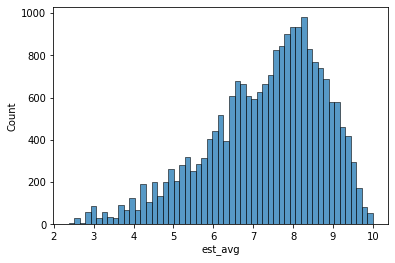

In [87]:
sns.histplot(pred_df_merged_['est_avg'])

### Comparing each collaborative model independently

In [88]:
print('RMSE for SVD Collaborating Filter Model =', svd_acc_)
print('RMSE for item-item based KNNWithMeans Collaborating Filter Model =', knn_item_acc_)
print('RMSE for user-user based KNNWithMeans Collaborating Filter Model =', knn_user_acc_)

RMSE for SVD Collaborating Filter Model = 3.198590516796809
RMSE for item-item based KNNWithMeans Collaborating Filter Model = 2.9666690248527408
RMSE for user-user based KNNWithMeans Collaborating Filter Model = 2.9498528772972876


In [89]:
# SVD collaboration filtering prediction evaluation
svd_pred_df.describe().T

,count,mean,std,min,25%,50%,75%,max
r_ui,15021.0,7.770188,2.731294,1.0,6.00000,8.000000,10.00000,10.0
est,15021.0,7.439207,1.699119,1.0,6.41605,7.636563,8.72225,10.0


In [90]:
# KNNWithMeans item-item based collaboration filtering prediction evaluation
knn_item_pred_df.describe().T

,count,mean,std,min,25%,50%,75%,max
r_ui,15021.0,7.770188,2.731294,1.0,6.000000,8.000000,10.00000,10.0
est,15021.0,7.624373,1.349971,1.0,6.903272,7.888357,8.56112,10.0


In [91]:
# KNNWithMeans user-user based collaboration filtering prediction evaluation
knn_user_pred_df.describe().T

,count,mean,std,min,25%,50%,75%,max
r_ui,15021.0,7.770188,2.731294,1.0,6.000000,8.000000,10.000000,10.0
est,15021.0,7.675655,1.269853,1.0,7.031709,7.889891,8.536355,10.0


Text(0.5, 1.0, 'KNNWithMeans User Based')

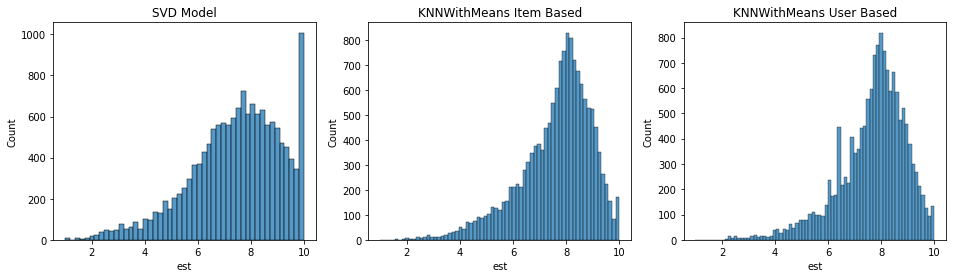

In [92]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
sns.histplot(svd_pred_df['est'], ax=ax[0]).set_title('SVD Model')
sns.histplot(knn_item_pred_df['est'], ax=ax[1]).set_title('KNNWithMeans Item Based')
sns.histplot(knn_user_pred_df['est'], ax=ax[2]).set_title('KNNWithMeans User Based')

In [93]:
test_df = pd.DataFrame(testset, columns=['product_name', 'author', 'score'])

<AxesSubplot:xlabel='score', ylabel='Count'>

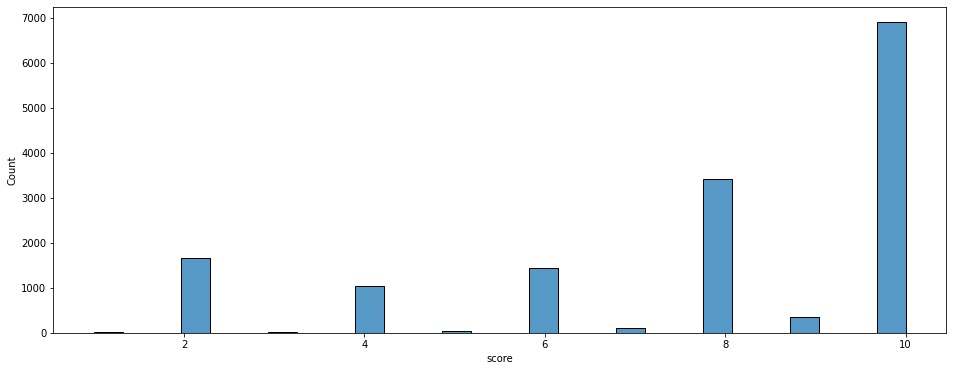

In [94]:
plt.figure(figsize=(16, 6))
sns.histplot(test_df['score'])

#### Observations & Inferences:
1. Based on RMSE score, KNNWithMeans is performing better than SVD model.
2. Based on the visualization, we can observe, KNNWithMeans have generalized the scoring around 8 rating while in SVD, we can observe the peak around 8 rating and 2nd peak for ratng 10.
3. In original ratings plot, we can see ratings for 10 is maximum followed by 8 rating. Same pattern we can observe in SVD model estimation. While KNNWithMeans performing better on RMSE score but having a big difference in the patterns.
4. We can infer that KNNWithMeans is easily scalable for co-rated items but SVD performs better in predicting the rating.
5. KNNWithMeans in easy in implementation and new data can be added easily but faces problem with new user/item.
6. SVD works better with sparse data and information can be easily loss due to dimensionality reduction.

### Recommend top 5 products for user in testset

We are going to use user based collaboration filter for recommending the products based on the similarity between users through common rated items.

**Note:** I am using the users from test dataset and recommending the product based on complete dataset where user have not rated the product already.

In [95]:
# Users in testset
user_list = pd.DataFrame(testset)[0].unique()

In [96]:
print('There are total {} users in the testset.'.format(len(user_list)))

There are total 614 users in the testset.


In [97]:
user_list = pd.DataFrame(user_list)

# Default column for merging with product list
user_list['key'] = 1

In [98]:
product_list = data_final['product_name'].unique()

In [99]:
print('There are total {} products in the overall dataset.'.format(len(product_list)))

There are total 2221 products in the overall dataset.


In [100]:
product_list = pd.DataFrame(product_list)

# Default column for merging with user list
product_list['key'] = 1

In [101]:
predict_input = pd.merge(user_list, product_list, on ='key').drop("key", 1)

In [102]:
predict_input.columns = ['author', 'product_name']

In [103]:
predict_input.shape

(1363694, 2)

As dataset is huge, so I am converting the dataframe to surpise dataset and create a testset from the input dataset.
For finding the score on the dataset, we will use test method from the model which will give estimate score in less time.
 

In [104]:
# Removing records where user have already rated the product
predict_input_merged = predict_input.merge(data_final, on=['author', 'product_name'], how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1)

In [105]:
predict_input_merged['score'] = 0

In [106]:
predict_input_final = Dataset.load_from_df(predict_input_merged[['author','product_name','score']], reader)

In [107]:
NA, predict_test = train_test_split(predict_input_final, test_size=1.0)

In [108]:
predictions = knn_user_.test(predict_test)

In [109]:
recommend_df = pd.DataFrame(predictions)

In [110]:
recommend_df['was_impossible'] = recommend_df['details'].apply(lambda x: x['was_impossible'])

In [111]:
# Dropping r_ui as default rating was initialized as 0
recommend_df.drop('r_ui', axis=1, inplace=True)

In [112]:
recommend_df.head(10)

,uid,iid,est,details,was_impossible
0,ÐÐ¸ÐºÐ¸ÑÐ°,sanyo-pro-700,9.021277,"{'actual_k': 2, 'was_impossible': False}",False
1,Tommy,sony-ericsson-t610,10.000000,"{'actual_k': 5, 'was_impossible': False}",False
2,Mark,lenovo-k6-dual,8.919027,"{'actual_k': 13, 'was_impossible': False}",False
3,Gianni,samsung-sgh-e200,8.434783,"{'actual_k': 0, 'was_impossible': False}",False
4,peter,sony-ericsson-c905,7.559668,"{'actual_k': 11, 'was_impossible': False}",False
5,Melissa,samsung-galaxy-avant,7.697344,"{'actual_k': 5, 'was_impossible': False}",False
6,S,motorola-v3690,7.461538,"{'actual_k': 1, 'was_impossible': False}",False
7,Pasquale,lg-vx-8350,8.968598,"{'actual_k': 11, 'was_impossible': False}",False
8,fred,blu-studio-m-hd,8.318182,"{'actual_k': 4, 'was_impossible': False}",False
9,Carlo,vodafone-smart-ii,7.746942,"{'was_impossible': True, 'reason': 'User and/o...",True


In [113]:
recommend_df.shape

(1303908, 5)

In [114]:
# Dropping records where was_impossible = False
recommend_df.drop(recommend_df[recommend_df['was_impossible'] == True].index, axis=0, inplace=True)

In [115]:
recommend_df.shape

(1282462, 5)

In [116]:
from collections import defaultdict
def recommend_product(df, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for i, col in df.iterrows():
        top_n[col['uid']].append((col['iid'], col['est']))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [117]:
top_n = recommend_product(recommend_df)

for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

ÐÐ¸ÐºÐ¸ÑÐ° ['huawei-w1', 'samsung-sch-r355', 'huawei-ascend-mate-2', 'xiaomi-redmi-note-3-pro', 'huawei-honor-6x']
Tommy ['sony-ericsson-t610', 'blackberry-9720', 'motorola-razr-v3m-357929', 'sony-ericsson-k550i', 'google-pixel']
Mark ['motorola-droid-razr-m', 'asus-zenfone-2-laser-ze601kl', 'motorola-moto-z-play', 'samsung-galaxy-avant', 'nokia-8800']
Gianni ['htc-one-sv', 'samsung-galaxy-s8-plus', 'lg-p715-optimus-l7-ii', 'motorola-moto-g5', 'samsung-c5212']
peter ['nokia-6600', 'nokia-6350', 'lg-elite-ls696', 'htc-desire-eye-m910x', 'cubot-s600']
Melissa ['nokia-6310i', 'samsung-sgh-x700', 'huawei-w1', 'samsung-galaxy-express-i437', 'lenovo-vibe-x2']
S ['nokia-2710', 'alcatel-one-touch-995', 'asus-zenfone-3-deluxe', 'sony-ericsson-w200i', 'meizu-pro-6']
Pasquale ['huawei-p8-max', 'nokia-5610', 'samsung-b3310', 'samsung-galaxy-mega-2-sm-g750', 'tp-link-archer-t6e']
fred ['apple-iphone-7-plus', 'vodafone-785-smart-4-mini', 'motorola-moto-z-play', 'motorola-gleam', 'meizu-pro-5']
Jos

### Outliers Detection

We are going to use SVD model prediction dataset for finding outlier and treating them.

In [118]:
svd_pred_df.head()

,uid,iid,r_ui,est,details
0,Amazon Customer,lg-g2-mini,6.0,6.962846,{'was_impossible': False}
1,Brian,samsung-galaxy-mega-6-3-i9200,10.0,7.341063,{'was_impossible': False}
2,Jo,htc-flyer,10.0,6.353554,{'was_impossible': False}
3,Enrico,huawei-ascend-y5-y560,8.0,8.368273,{'was_impossible': False}
4,e-bit,motorola-defy,6.0,6.668944,{'was_impossible': False}


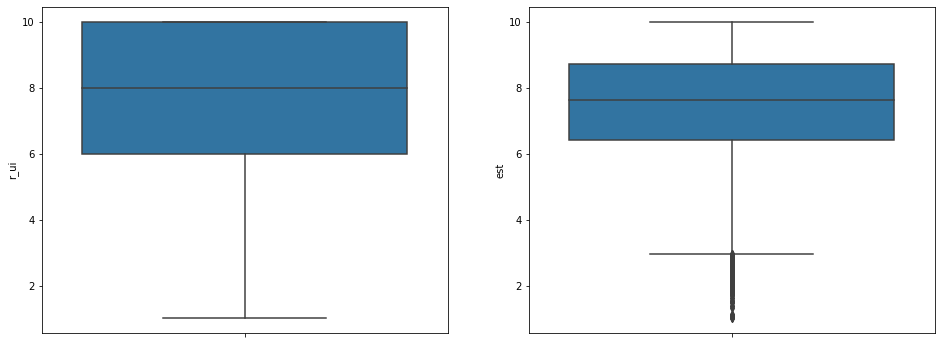

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(y=svd_pred_df['r_ui'], ax=ax[0])
sns.boxplot(y=svd_pred_df['est'], ax=ax[1])
plt.show()

#### Observations:
1. We can observe in the actual rating by the users, there are no outliers present.
2. The estimate rating predicted by SVD, there is high number of outliers present.
3. Outliers present in the dataset for the rating 3 or below only.
4. First we can try rounding off the est and check for outliers. 

In [120]:
# Rounding off the rating 
svd_pred_df['est_round'] = svd_pred_df['est'].apply(roundOff)

<AxesSubplot:ylabel='est_round'>

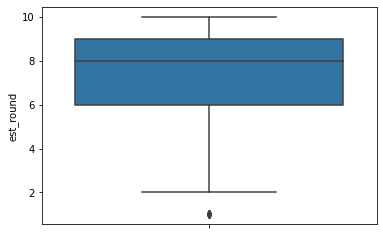

In [121]:
sns.boxplot(y=svd_pred_df['est_round'])

In [122]:
svd_pred_df['est_round'].value_counts()

8.0     3528
7.0     3090
9.0     2814
6.0     2035
10.0    1623
5.0     1011
4.0      509
3.0      299
2.0       99
1.0       13
Name: est_round, dtype: int64

#### Conclusion:
1. As we can see there are only few outliers present where rating = 1. Either we can drop the records or cap those records at rating = 2.

## Cross Validation

In [123]:
# SVD Model Hyperparameter tuning
param_grid = {'n_factors':[50, 100, 150],'n_epochs':[20, 30],  'lr_all':[0.005, 0.01],'reg_all':[0.02, 0.1]}
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
grid_search.fit(dataset)

In [124]:
# Best parameters based on GridSearchCV
grid_search.best_params

{'rmse': {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}}

In [125]:
svd_mod = SVD(lr_all=grid_search.best_params['rmse']['lr_all'], n_epochs=grid_search.best_params['rmse']['n_epochs'], n_factors=grid_search.best_params['rmse']['n_factors'], reg_all=grid_search.best_params['rmse']['reg_all'])

In [126]:
svd_mod.fit(trainset)
svd_mod_pred = svd_mod.test(testset)

accuracy.rmse(svd_mod_pred)

RMSE: 2.8152


2.815228962850359

In [127]:
# Cross validation the SVD model
print(cross_validate(svd_mod, dataset, measures=['RMSE', 'MAE'], cv=10, verbose=True))

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    2.8406  2.8215  2.7934  2.8393  2.8164  2.7677  2.8699  2.7899  2.7625  2.8103  2.8112  0.0320  
MAE (testset)     2.2855  2.2681  2.2473  2.2907  2.2645  2.2228  2.3124  2.2385  2.2252  2.2551  2.2610  0.0277  
Fit time          2.05    1.90    1.93    1.90    1.96    1.95    2.05    1.98    1.95    1.94    1.96    0.05    
Test time         0.04    0.04    0.04    0.04    0.04    0.04    0.04    0.04    0.04    0.04    0.04    0.00    
{'test_rmse': array([2.84061528, 2.82146551, 2.79340357, 2.83930493, 2.81643573,
       2.7676952 , 2.86987134, 2.78989943, 2.76254392, 2.81029619]), 'test_mae': array([2.28553525, 2.26808506, 2.24729366, 2.29068862, 2.26453892,
       2.22278881, 2.31244497, 2.23850694, 2.22522425, 2.25513114]), 'fit_time': (2.050812005996704, 1.9021573066711426, 1.9271833896636963, 

#### Observations:
1. Based on 10 iterations, we can conclude the model is performing consistently.
2. The mean value and separate fold wise score for RMSE and MAE is almost same.
3. The Standard Deviation for 10 folds is accepatable.
___

## Popularity Based Recommendation Systems
Popularity based recommendation system works on the principle popularity or anything which is in trend based on the simple filters.

**In what business scenario you should use popularity based Recommendation Systems?**

1. When you don't have any historical data as it does not suffer from cold start problem.
2. When a new business opens up even on 1st day recommendation can be provided.

Example: 
* Google News: News filtered by trending and most popular news.
* YouTube: Trending videos in the country.
* Twitter: Trends based on filtered location by user.
* Zomato: Most ordered dish from the particular restaurant.

Challenges of popularity based recommendation systems:
1. Not personalized based on user.
2. It will show same recommendation to every user.


## Collaborative Filtering Based Recommendation System

Collaborative Filtering Based Recommendation System works around the interactions that users have with items which helps in identifying the patterns that data about the items or users itself cannot have.

**In what business scenario you should use CF based Recommendation Systems?**

1. When you want to provide personalized recommendation for the user based on the similarity between the products or user.
2. When you have various categories of products and don't want to restrict to one category for recommendation to user.
3. When you want to cross sell the products which can be bought together with the other product.

Example:
* Amazon: Product recommendation based on recent purchased product
* Netflix: Movies recommendation based on recently watched movie.
* Facebook: Friends suggestion based on common friends and activity.

Limitations of popularity based recommendation systems:
1. Product list can be huge while the users might have rated only few products. 
2. For a new user or item, there won't be enough data to accurate recommendations.
3. For recommending to million of users for thousands of products, large amount of computation power is required. 

### Possible methods to improve the recommendation for different users

The best way to improve recommendation is by hybrid approach, by combining collaborative filtering, content based filter and other approaches. 
Hybrid approach can be implemented in several ways:
1. by making content-based and collaborative-filtering preddictions separately and then combining them.
2. by adding content-based capabilities to collaborative-based approach.
3. by adding weightage to predictions by different models and take out the average for final recommendation.
4. by deriving new feature from various other features by adding them and give to recommendation algorithm.

Netflix is good example of hybrid recommender system. Netflix make recommendations by comparing the watching and searching habits of similar users(Collaborative filtering) as well as offering movies that share the similar characteristics with movies that a user has rated highly(Content Based filtering).